In [1]:
import numpy as np
import torch
from torch import tensor
import matplotlib.pyplot as plt, seaborn as sns
sns.set()
torch.set_printoptions(precision=3, linewidth=100)

In [131]:
def f(x): 
    if x < -3: return 3
    if x < -1: return 2
    if x < 0: return 0
    if x < 1: return 1
    if x < 2: return 2
    return 3
x = torch.linspace(-5, 5, 20)
y = torch.tensor(list(map(f, x)))

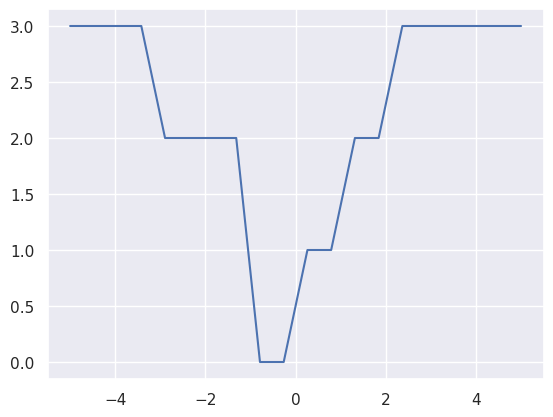

In [132]:
plt.plot(x, y)

In [133]:
x = x[:, None]; y = y[:, None]

<br><br> **NN arch** <br>
1 → 50 → 1

**using torch.nn**

In [5]:
import torch.nn as nn, torch.nn.functional as F

In [75]:
def log_softmax(x): return x - x.exp().sum(dim=-1, keepdim=True).log()

In [76]:
def loss_func(preds, target): return -preds[range(len(target)), target[:, 0]].mean()

In [112]:
class Model():
    def __init__(self):
        super().__init__()
        self.layers = [nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 50), nn.ReLU(), nn.Linear(50, 4), log_softmax]
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [134]:
model = Model()

In [135]:
with torch.no_grad(): print(loss_func(model(x), y))

tensor(1.587)


In [141]:
bs = 20
epochs = 10000
lr = 2e-3

for epoch in range(epochs):
    # Shuffle the data
    shuffle_idxs = torch.randperm(len(x))
    x = x[shuffle_idxs]; y = y[shuffle_idxs]
    for i in range(0, len(x), bs):
        idxs = slice(i, min(len(x), i+bs))
        x_b = x[idxs, :]; y_b = y[idxs, :]

        preds = model(x_b)
        loss = loss_func(preds, y_b)
        loss.backward()
        with torch.no_grad():
            for l in range(2):
                model.layers[2*l].weight -= lr*model.layers[2*l].weight.grad
                model.layers[2*l].bias -= lr*model.layers[2*l].bias.grad
                model.layers[2*l].weight.grad.zero_()
                model.layers[2*l].bias.grad.zero_()
    if epoch%100 == 0: print(loss)

tensor(0.264, grad_fn=<NegBackward0>)
tensor(0.263, grad_fn=<NegBackward0>)
tensor(0.262, grad_fn=<NegBackward0>)
tensor(0.262, grad_fn=<NegBackward0>)
tensor(0.261, grad_fn=<NegBackward0>)
tensor(0.260, grad_fn=<NegBackward0>)
tensor(0.259, grad_fn=<NegBackward0>)
tensor(0.258, grad_fn=<NegBackward0>)
tensor(0.257, grad_fn=<NegBackward0>)
tensor(0.256, grad_fn=<NegBackward0>)
tensor(0.256, grad_fn=<NegBackward0>)
tensor(0.255, grad_fn=<NegBackward0>)
tensor(0.254, grad_fn=<NegBackward0>)
tensor(0.253, grad_fn=<NegBackward0>)
tensor(0.252, grad_fn=<NegBackward0>)
tensor(0.251, grad_fn=<NegBackward0>)
tensor(0.251, grad_fn=<NegBackward0>)
tensor(0.250, grad_fn=<NegBackward0>)
tensor(0.249, grad_fn=<NegBackward0>)
tensor(0.248, grad_fn=<NegBackward0>)
tensor(0.247, grad_fn=<NegBackward0>)
tensor(0.247, grad_fn=<NegBackward0>)
tensor(0.246, grad_fn=<NegBackward0>)
tensor(0.245, grad_fn=<NegBackward0>)
tensor(0.244, grad_fn=<NegBackward0>)
tensor(0.243, grad_fn=<NegBackward0>)
tensor(0.243

In [142]:
test_x = torch.linspace(-5, 5, 1000).view(-1, 1)
test_y = torch.tensor(list(map(f, test_x))).view(-1, 1)

([<matplotlib.lines.Line2D at 0x7f671a3d82e0>],
 [<matplotlib.lines.Line2D at 0x7f671a36ffd0>])

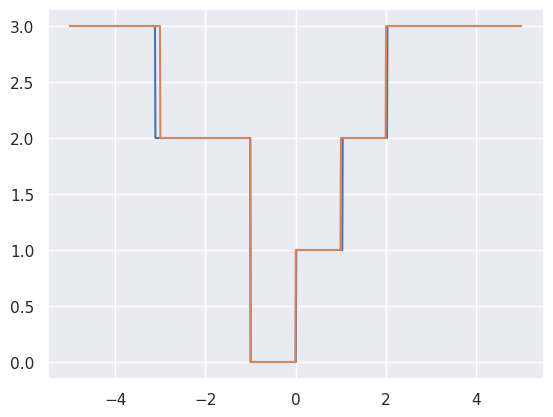

In [143]:
with torch.no_grad():
    test_preds = model(test_x).argmax(dim=1)
plt.plot(test_x, test_preds), plt.plot(test_x, test_y)